## データの可視化について
## 箱ひげ図編

データの分布を見るために利用する。


### データの取り込み

ポケモンののデータセットを取り込む(https://www.kaggle.com/abcsds/pokemon#Pokemon.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pkmn = pd.read_csv('./input/Pokemon.csv') 

In [2]:
pkmn.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round
- Generation: Number of generation
- Legendary: True if Legendary Pokemon False if not (more revision on mythical vs legendary needed)

In [3]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


【箱ひげ図を使用する際に使用する用語説明】
- パーセンタイル(分位点)・・・データを小さい順にならべたときに、頭から数えて、N%の位置にあるデータを、Nパーセンタイル(N%分位点)と呼ぶ
- 四分位点・・・小さいもの順に並び替えられたデータを4等分した時の3つの分割点のこのである
- 第1四分位点・・・25パーセンタイルにあたる値
- 第2四分位点・・・50パーセンタイルにあたる値(中央値)
- 第3四分位点・・・75パーセンタイルにあたる値
- 四分位範囲(IQR,箱)・・・　以下の式で算出されるものを、四分位範囲、またはIQRと呼ぶ

  $四分位範囲(IQR)=75パーセンタイル（第三四分位数）－25パーセンタイル（第一四分位数）$  



- 外れ値・・・測定ミスなどによる観測された異常な値のこと  
- ひげ・・・箱からデータの最大値から最小値までの値、または「第一四分位数-1.5×IQR」をひげの下限,「第三四分位数+1.5×IQR」をひげの上限とし,それらの上限、下限から外れた値を外れ値として扱う
      



### 箱ひげ図によるデータの可視化

#### pandas.DataFrame.plotを用いた場合

Generation
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

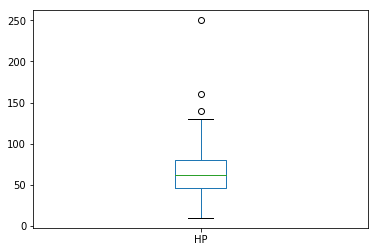

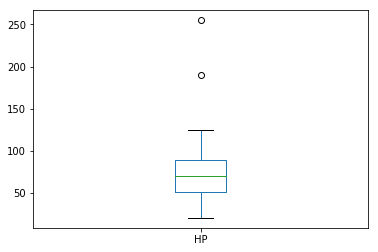

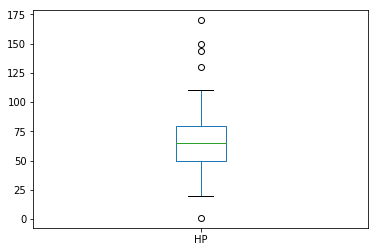

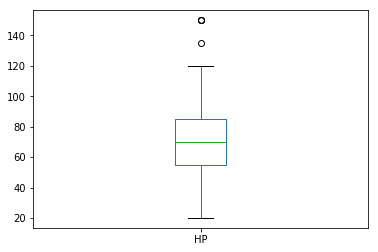

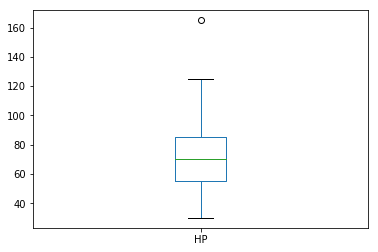

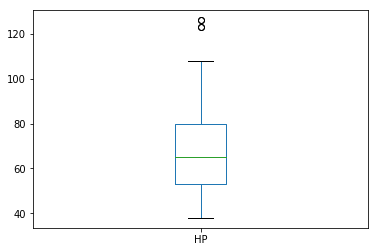

In [17]:
pkmn.groupby("Generation").plot.box(y="HP") #描画データの選択

【参考】  
pandas.DataFrame.plot.boxについて(公式):https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html

#### matplotlibを用いた場合

matplotlibは1

{'whiskers': [<matplotlib.lines.Line2D at 0x7f02d5d4a5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f02d5d4af60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f02d5d4a470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02d5d51860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f02d5d51cc0>],
 'means': []}

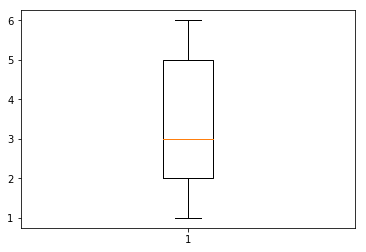

In [22]:
plt.boxplot("Generation",data=pkmn) #描画データの選択

【参考】  
matplotlib.pyplot.boxplotにいて(公式):https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

#### seabornを用いた場合

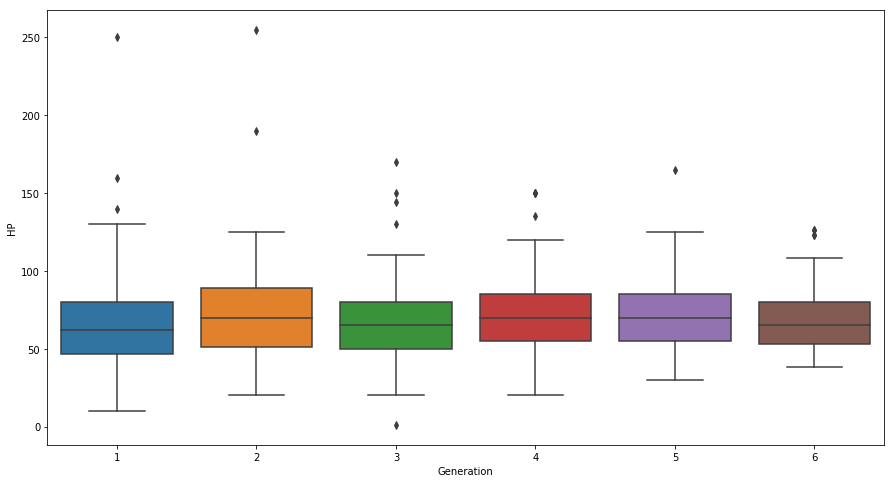

In [2]:
import seaborn as sns 

plt.figure(figsize=(15, 8)) #描画領域のサイズ調整
sns.boxplot(x="Generation", y ="HP",data=pkmn) #箱ひげ図の描画(x軸,y軸の設定)

【参考】  
boxplotについて(公式):https://seaborn.pydata.org/generated/seaborn.boxplot.html

### 【補足】箱ひげ図からの派生グラフ

#### 1.stripplot

箱ひげ図の中の個々のデータの分布・ばらつき具合を見たいときに用いる

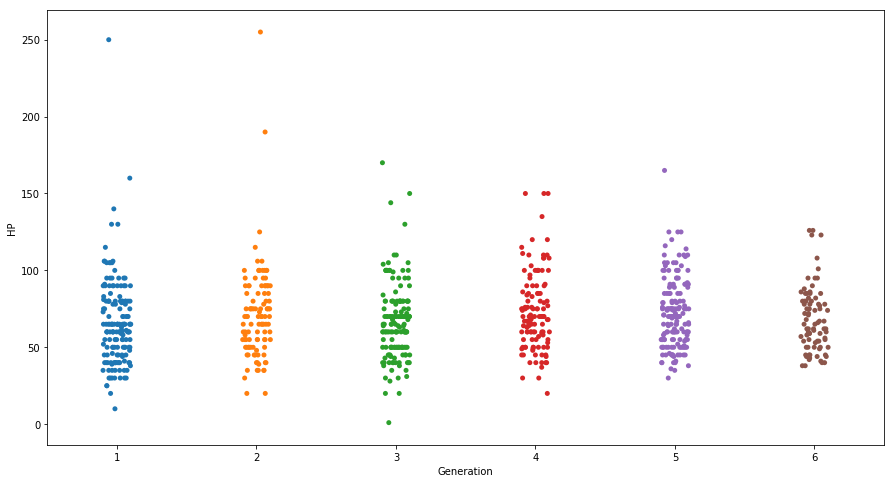

In [3]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整
sns.stripplot(x="Generation", y ="HP",data=pkmn) #stripplotの描画(x軸,y軸の設定)

【参考】  
stripplotについて(公式):https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot

#### 2.swarmplot
stripplotを用いるよりもデータの分布をわかりやすく可視化することができる

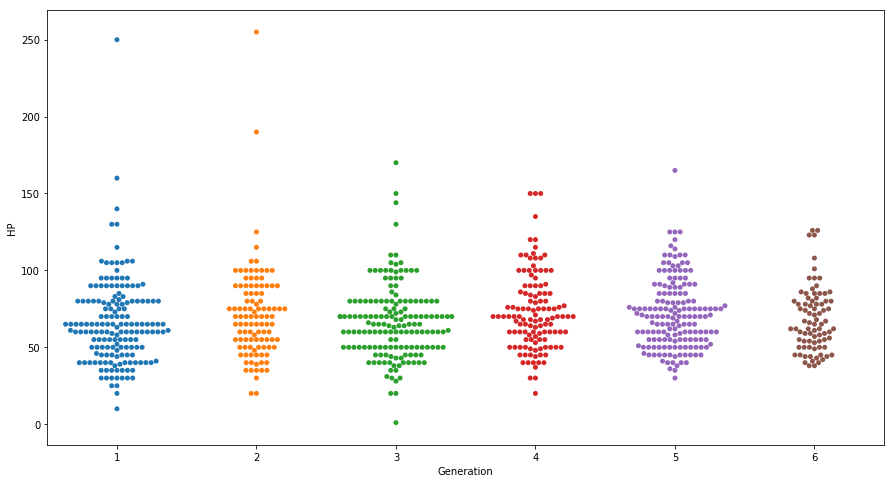

In [4]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整
sns.swarmplot(x="Generation", y ="HP",data=pkmn) #swarmplotの描画(x軸,y軸の設定)

【参考】  
swarmplotについて(公式):https://seaborn.pydata.org/generated/seaborn.swarmplot.html

#### 3.violinplot
各変数の分布を可視化できる

/home/ec2-user/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


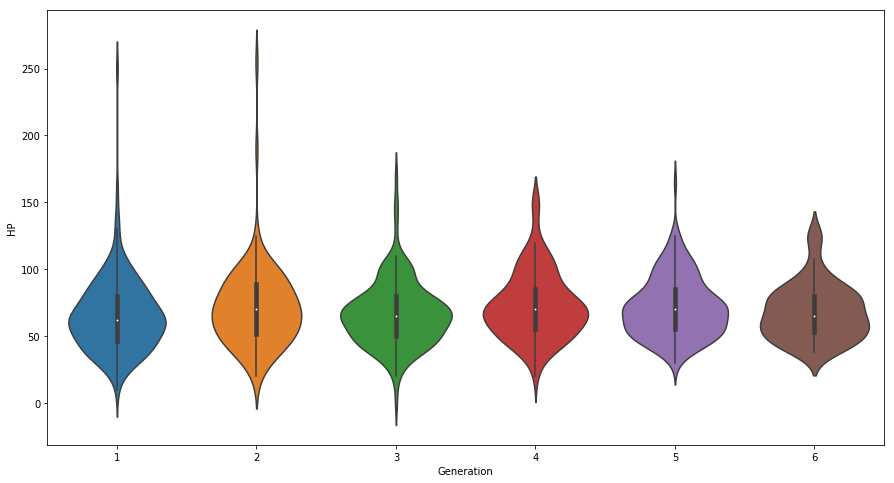

In [5]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整

ax = sns.violinplot(x="Generation", y ="HP",data=pkmn) #violinplotの描画(x軸,y軸の設定)

【参考】  
violinplotについて(公式):https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot  
バイオリンプロットを用いて属性ごとのポケモンの強さを可視化する方法:https://qiita.com/maskot1977/items/2680927b58cdc4fad8d4#%E3%83%90%E3%82%A4%E3%82%AA%E3%83%AA%E3%83%B3%E3%83%97%E3%83%AD%E3%83%83%E3%83%88

#### (おまけ)2.swarmplotと3.violinplotをまとめて表現する

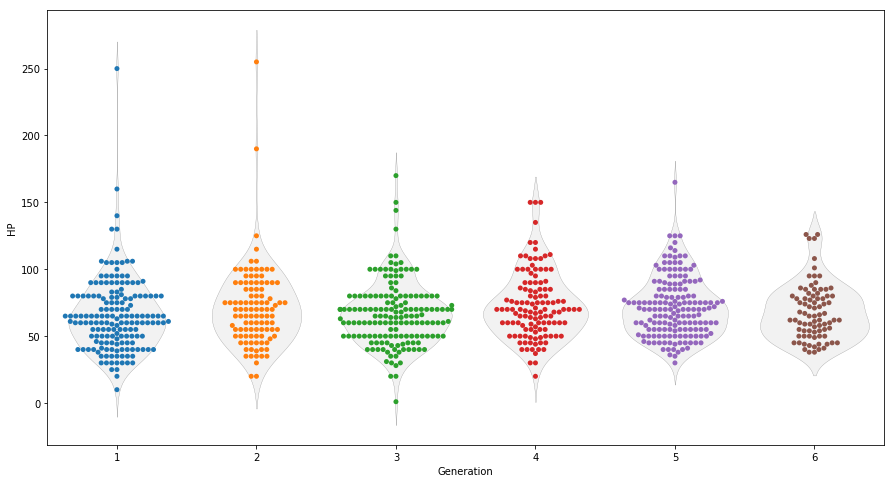

In [6]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整

sns.violinplot(x="Generation", y ="HP",data=pkmn, inner=None, color="0.95", linewidth=0.3) #見やすい図を作成するためにviolinplotの色や線の太さを調整
sns.swarmplot(x="Generation", y ="HP",data=pkmn) 

#### 4.lvplot

箱ひげ図の改良版として提唱された手法である。
大規模なデータセットに対して箱ひげ図を用いて図示すると、多くのデータが外れ値として表現されてしまい、ひげ(最小値〜第1四分位点，第3四分位点〜最大値)が非常に長い図となってしまう傾向であった。
そのためひげの部分で表現される値について詳細に表現することができなかった。

このデメリットを解消したものがlvplotと呼ばれる図であり、第1(3)四分位点の外側の分布も可視化することを可能にした。



/home/ec2-user/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


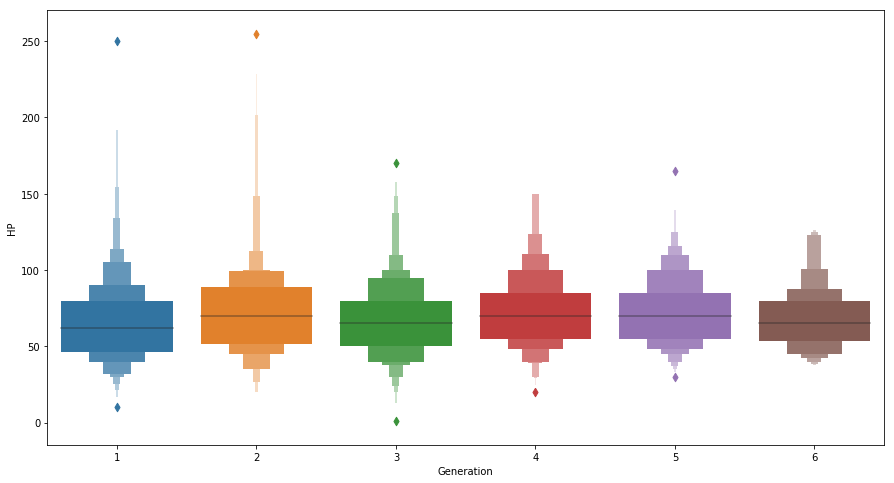

In [7]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整
sns.lvplot(x="Generation", y ="HP",data=pkmn) #lvplotの描画(x軸,y軸の設定)

【参考】  
lvplotについての論文:http://vita.had.co.nz/papers/letter-value-plot.pdf  
lvplotの使い方:https://kite.com/python/docs/seaborn.lvplot

#### 5.pointplot
点が打たれている箇所が平均値(mean)で、線が引かれているのが95%信頼区間(データの範囲)である。  
複数の系列と平均値や信頼区間の比較に用いることがある。

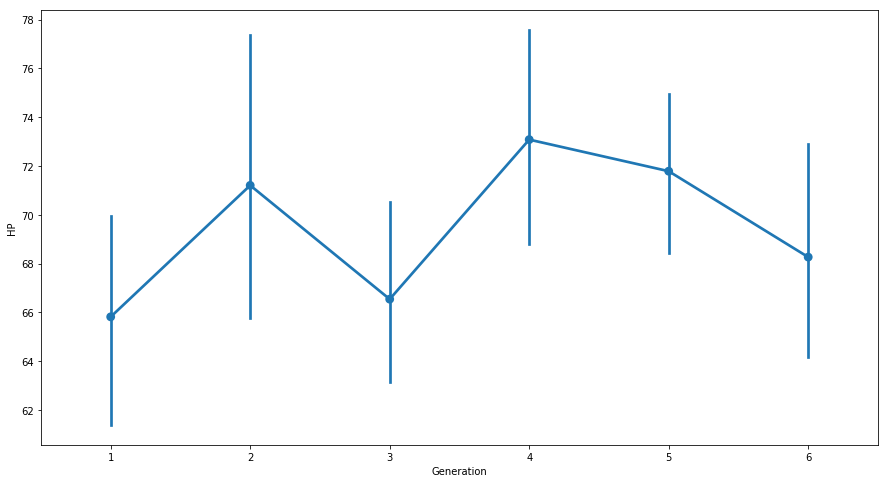

In [8]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整
sns.pointplot(x="Generation", y ="HP",data=pkmn) #pointplotの描画(x軸,y軸の設定)

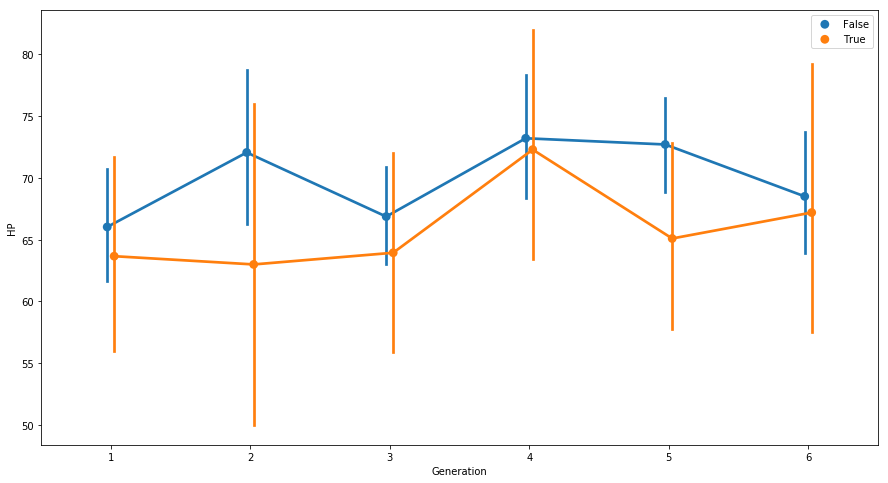

In [17]:
plt.figure(figsize=(15, 8)) #描画領域のサイズ調整

sns.pointplot(x=pkmn["Generation"], y =pkmn["HP"], hue=( pkmn["Type 1"].isin(["Grass"]) | pkmn["Type 2"].isin(["Grass"])), dodge=True) #hueオプションを用いることで、複数の系列のデータをわかりやすく可視化することができる

上記草タイプ以外(左)と草タイプ(右)のHPの分布を比較を行った。  
シリーズ全般を通じて、草タイプのポケモンのHPの平均は低めという傾向が読み取れる。  
【参考】  
pointplotのオプションについて(公式):https://seaborn.pydata.org/generated/seaborn.pointplot.html

【参考】  
seabornによる統計データ可視化（ポケモン種族値を例に）(1):http://mizti.hatenablog.com/entry/2017/11/18/seaborn1